# JUMPlus Python Project 4 - Part 2

## Aotherlysis of Cleaned Video Game Sales Data

### by Nicholas Crossman

In the first part, we did some basic cleaning of the dataset. Our video game sales dataset had a significant portion of missing values. We dropped six columns of the original 16 for having over 39% of their values missing, and then dropped all remaining rows with missing values.

Now, our data set is cleaned, and we can begin performing analysis.

First, we'll import our libraries and the cleaned data from our file.

In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sb

data = pd.read_csv("cleaned_game_sales.csv")

data.shape

(16416, 10)

Let's print out the first 5 records.

In [11]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Let's display the list of columns so we can be sure how many we have.

In [6]:
data.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

We'll also show the last 5 rows.

In [7]:
data.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16411,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01
16412,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01
16413,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01
16414,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01
16415,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01


Let's now use the `.describe()` function to get a summary of the dataset.

In [9]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


## Analysis

Now that we have our dataset, let's make some visualizations to try and understand this data.

### Sales By Year

First, we'll plot game sales in each region by year, to see which years were better for each region.

The `.sum()` function adds the sales data into one value for each year.

In [19]:
na_sales = data.groupby(data['Year_of_Release'])['NA_Sales'].sum()
eu_sales = data.groupby(data['Year_of_Release'])['EU_Sales'].sum()
jp_sales = data.groupby(data['Year_of_Release'])['JP_Sales'].sum()
other_sales = data.groupby(data['Year_of_Release'])['Other_Sales'].sum()

Now we put them all into one DataFrame so they can be plotted together.

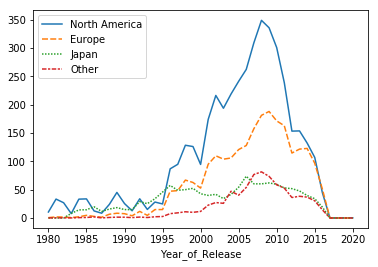

In [22]:
sales_by_year = pd.DataFrame({'North America': na_sales, 'Europe': eu_sales, 'Japan': jp_sales, 'Other': other_sales})
sb.lineplot(data=sales_by_year)

Perhaps predictably, the financial collapse of 2008 seems to have had a significant effect on game sales in North America and Europe, though the effect seems less pronounced in Japan and the other regions.

### Sales By Genre

Since genre is a categorical attribute instead of a continuous one like year, this will have to be a bar plot instead. Each region will have its own graph, with each genre having its own bar. This should show which genre had the most sales in each region.

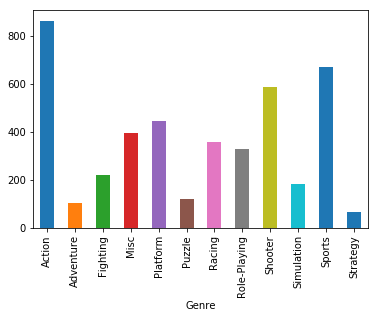

In [53]:
na_sales = data.groupby('Genre')['NA_Sales'].sum()
na_sales.plot.bar()

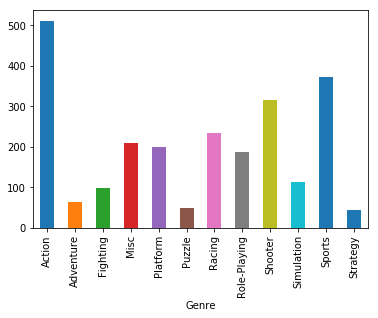

In [54]:
eu_sales = data.groupby('Genre')['EU_Sales'].sum()
eu_sales.plot.bar()

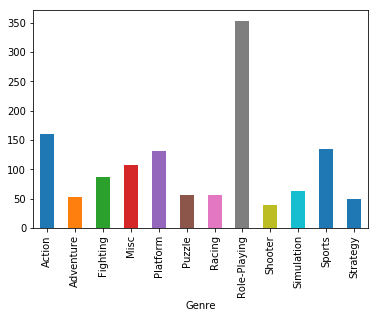

In [55]:
jp_sales = data.groupby('Genre')['JP_Sales'].sum()
jp_sales.plot.bar()

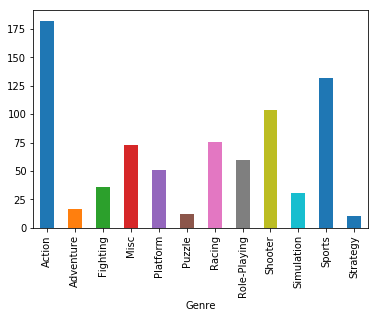

In [56]:
other_sales = data.groupby('Genre')['Other_Sales'].sum()
other_sales.plot.bar()

We see that `Action` had the most sales in North America, Europe, and Other, while Japan's highest-selling genre was `Role-Playing`.

## Sales by Platform

This will be very similar to the previous section, but we're grouping by `Platform` instead of by `Genre`.

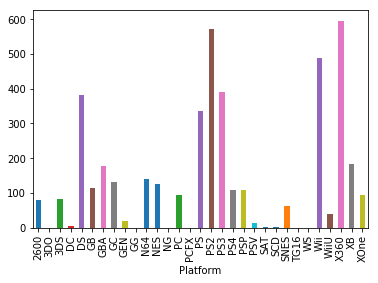

In [75]:
na_sales_platform = data.groupby('Platform')['NA_Sales'].sum()
na_sales_platform.plot.bar()

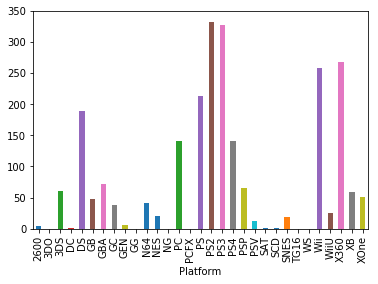

In [76]:
eu_sales_platform = data.groupby('Platform')['EU_Sales'].sum()
eu_sales_platform.plot.bar()

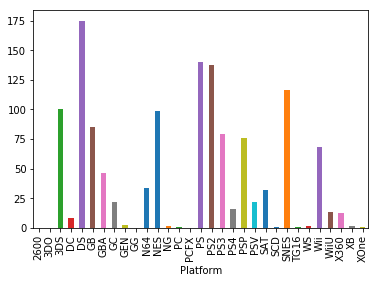

In [77]:
jp_sales_platform = data.groupby('Platform')['JP_Sales'].sum()
jp_sales_platform.plot.bar()

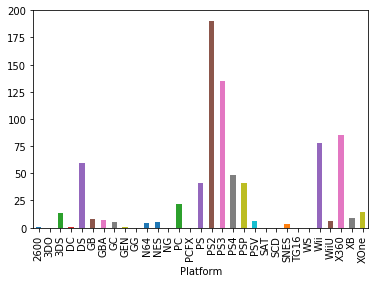

In [78]:
other_sales_platform = data.groupby('Platform')['Other_Sales'].sum()
other_sales_platform.plot.bar()

The bars show that North America's most popular platform was the XBox 360, Europe's was the PlayStation 2, Japan's was the Nintendo DS, and the other regions preferred the PS2.